<a href="https://colab.research.google.com/github/BrMrtn/GoogleColab/blob/main/K%C3%A9pfeldolgoz%C3%A1s/khf1_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Könyvtárak importálása

In [1]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook
import numpy as np

Képek letöltése

In [2]:
!wget https://raw.githubusercontent.com/BrMrtn/GoogleColab/main/resources/nature.jpg
!wget https://raw.githubusercontent.com/BrMrtn/GoogleColab/main/resources/iceberg.png
!wget https://raw.githubusercontent.com/BrMrtn/GoogleColab/main/resources/netflix.png

--2024-10-14 17:17:10--  https://raw.githubusercontent.com/BrMrtn/GoogleColab/main/resources/nature.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19266 (19K) [image/jpeg]
Saving to: ‘nature.jpg’

nature.jpg          100%[===================>]  18.81K  --.-KB/s    in 0.001s  

2024-10-14 17:17:10 (13.3 MB/s) - ‘nature.jpg’ saved [19266/19266]

--2024-10-14 17:17:10--  https://raw.githubusercontent.com/BrMrtn/GoogleColab/main/resources/iceberg.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 53226 (52K) [image/png]
Saving t

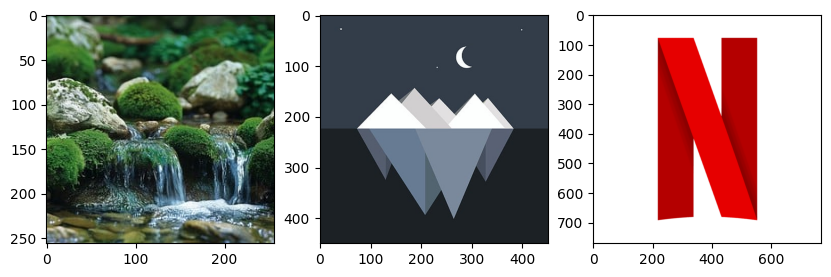

In [3]:
# képek beolvasása
img1 = cv2.imread("nature.jpg")
img2 = cv2.imread("iceberg.png")
img3 = cv2.imread("netflix.png")

# BGR-ből RGB-be konvertálás
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
img3 = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)

# tömb, hogy együtt kezelhessük a képeket
images = [img1, img2, img3]

# képek megjelenítése
fig, axs = plt.subplots(1, 3, figsize=(10, 10))
for i, img in enumerate(images):
    axs[i].imshow(img)

Képek szín-bitmélységének megváltoztatása - paletta alapján kvantálunk

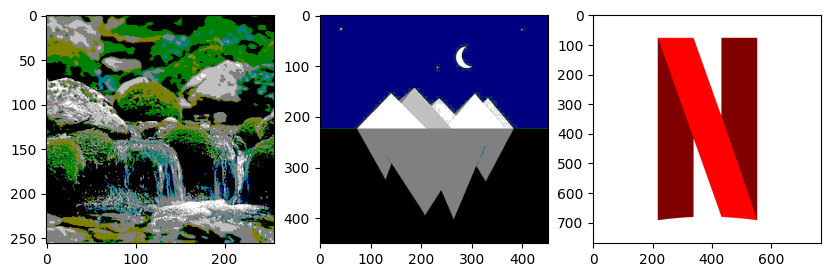

In [8]:
# 16 szín meghatározása
colors = np.array([
    [0, 255, 255],  # Aqua
    [0, 0, 0],      # Black
    [0, 0, 255],    # Blue
    [255, 0, 255],  # Fuchsia
    [128, 128, 128],# Gray
    [0, 128, 0],    # Green
    [0, 255, 0],    # Lime
    [128, 0, 0],    # Maroon
    [0, 0, 128],    # Navy
    [128, 128, 0],  # Olive
    [128, 0, 128],  # Purple
    [255, 0, 0],    # Red
    [192, 192, 192],# Silver
    [0, 128, 128],  # Teal
    [255, 255, 255],# White
    [255, 255, 0]   # Yellow
])

def closest_colors(pixels, colors):
    pixels = np.array(pixels)
    colors = np.array(colors)

    # broadcasting-gel minden pixel távolságát kiszámoljuk minden színtől
    # extra dimenziót hozzáadunk, hogy a numpy egyenlő dimenziósra változtathassa a tömböket
    distances = np.sqrt(
        ((pixels[:, None, 0] - colors[:, 0]) * 0.299) ** 2 +
        ((pixels[:, None, 1] - colors[:, 1]) * 0.587) ** 2 +
        ((pixels[:, None, 2] - colors[:, 2]) * 0.114) ** 2
    )

    # Legközelebbi szín indexének megkeresése minden pixelhez
    closest_indices = np.argmin(distances, axis=1)
    new_pixels = colors[closest_indices]

    return new_pixels

quantized_images = []

for img in images:
  pixels = img.reshape(-1, 3) # kép átalakítása 1 dimenziós rgb tömbbé
  new_pixels = closest_colors(pixels, colors) # legközelebbi szín megtalálása
  new_image = new_pixels.reshape(img.shape) # kép visszaalakítása eredetire
  quantized_images.append(new_image)

# képek megjelenítése
fig, axs = plt.subplots(1, 3, figsize=(10, 10))
for i, img in enumerate(quantized_images):
    axs[i].imshow(img)

A bal, majd a középső képen a legészrevehetőbb a színtér méretének csökkentése. Ennek oka, hogy sok "egymáshoz közeli" szín szerepel rajtuk (egy színnek sok árnyalata).

Képek méretének változtatása

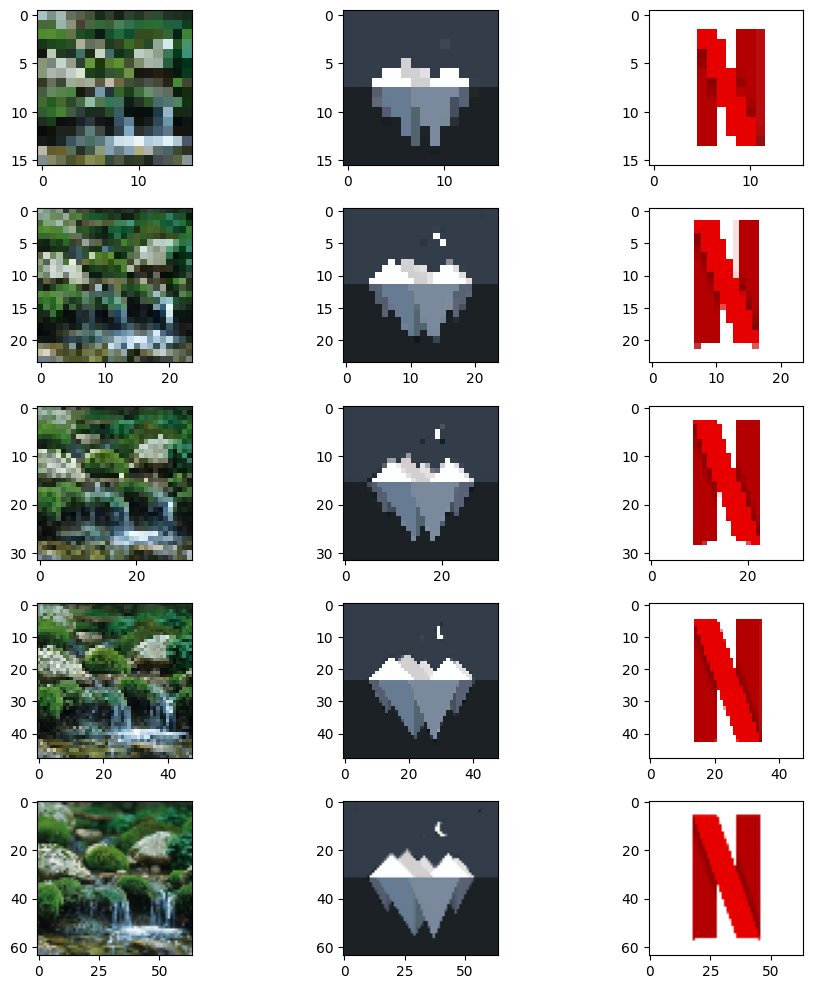

In [10]:
icons = []

# ikonok elkészítése - 16x16, 24x24, 32x32, 48x48, 64x64
icon_sizes = [16, 24, 32, 48, 64]
for size in icon_sizes:
  for img in images:
    icon = cv2.resize(img, (size, size))
    icons.append(icon)


fig, axs = plt.subplots(5, 3, figsize=(10, 10))
for row in range(5):
  for col in range(3):
    axs[row, col].imshow(icons[row * 3 + col])

plt.tight_layout()

Az eredményen látszik, hogy a kevesebb részlettel rendelkező, egyszerűbb alakzatokból összeálló képekből jobb ikonok lesznek.